
# Attention mechanism

In [47]:
import torch

inputs embedded in 3-dimension vector

In [48]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

take 2nd input sequence and use dot product to compute unnormalized attention scores

In [49]:
# query = inputs[1]
# attn_scores_x2 = torch.empty(inputs.shape[0])
# for i, x_1 in enumerate(inputs):
#   attn_scores_x2[i] = torch.dot(query, x_1)
#   print(attn_scores_x2)

multiply input sequence x2 with others

In [50]:
# result = 0
# for idx, element in enumerate(inputs[0]):
#     result += inputs[0][idx]*query[idx]
#     print(result)
#     print('---')
#     print(torch.dot(inputs[0], query))

normalize (sum up to 1) the attention score (omega) to attention weights (alpha)
Not preferred due inability to sustain larger value

In [51]:
# attn_w2 = attn_scores_x2 / attn_scores_x2.sum()
# print("Attention wights:", attn_w2)
# print("Sum of attention weights:", attn_w2.sum())

naive can also suffer from instability due to not able to handle under or over flow

In [52]:
# def softmax_naive(x):
#     return torch.exp(x)/torch.exp(x).sum(dim=0)
# attn_w2_naive = softmax_naive(attn_scores_x2)
# print("Attention wights (naive softmax):", attn_w2_naive)
# print("......")
# print("Sum of attention weights (naive softmax):", attn_w2_naive.sum())

softmax is recommended for better result

In [53]:
# attn_w2 = torch.softmax(attn_scores_x2, dim=0)
# print("Attention wights (softmax):", attn_w2)
# print("......")
# print("Sum of attention weights (softmax):", attn_w2.sum())

# notes
- weighted sum of input element(x[i to n] with respect to sepecific x(i.e 2)) is context vector (for example z of x(2) is z(2))
- unnormalized attention weights are called scores, when normalized (sum to 1) it is called attention weights
- q = query
- unnormalized attention score (w[omega]) w(21) = x(1)q(2)^T

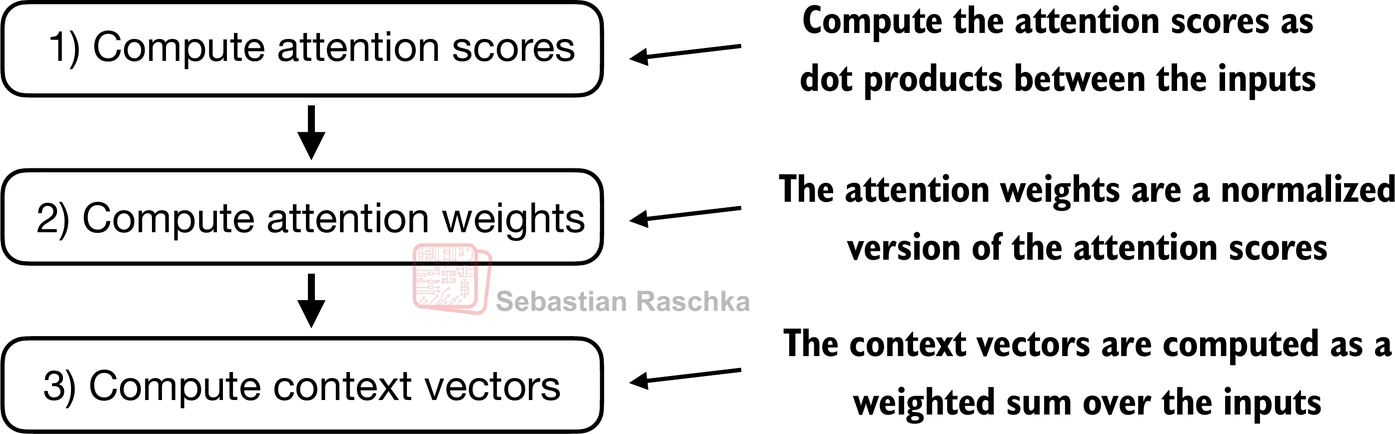


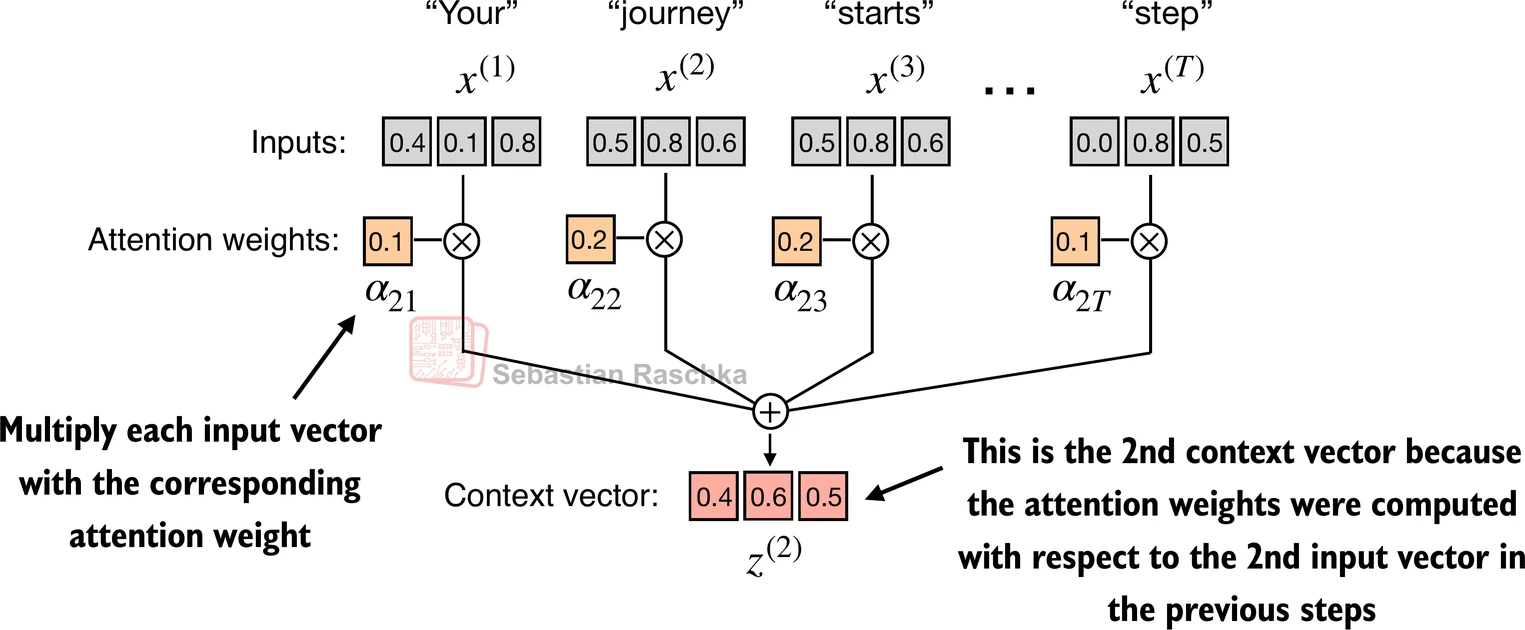

the process 3 step for all the inputs

In [54]:
attn_scores = inputs @ inputs.T
print("Attention scores matrix:\n", attn_scores)

Attention scores matrix:
 tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [55]:
attn_weights = torch.softmax(attn_scores, dim=1)
print(attn_weights)
print("-------------------------------")
#verification if the total attention weights for each query sum to 1
print("Sum of attention weights for each query:", attn_weights.sum(dim=1))

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
-------------------------------
Sum of attention weights for each query: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [56]:
all_context_vectors = attn_weights@inputs
print("All context vectors:\n", all_context_vectors)

All context vectors:
 tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


# Self attention -> Trainable weights
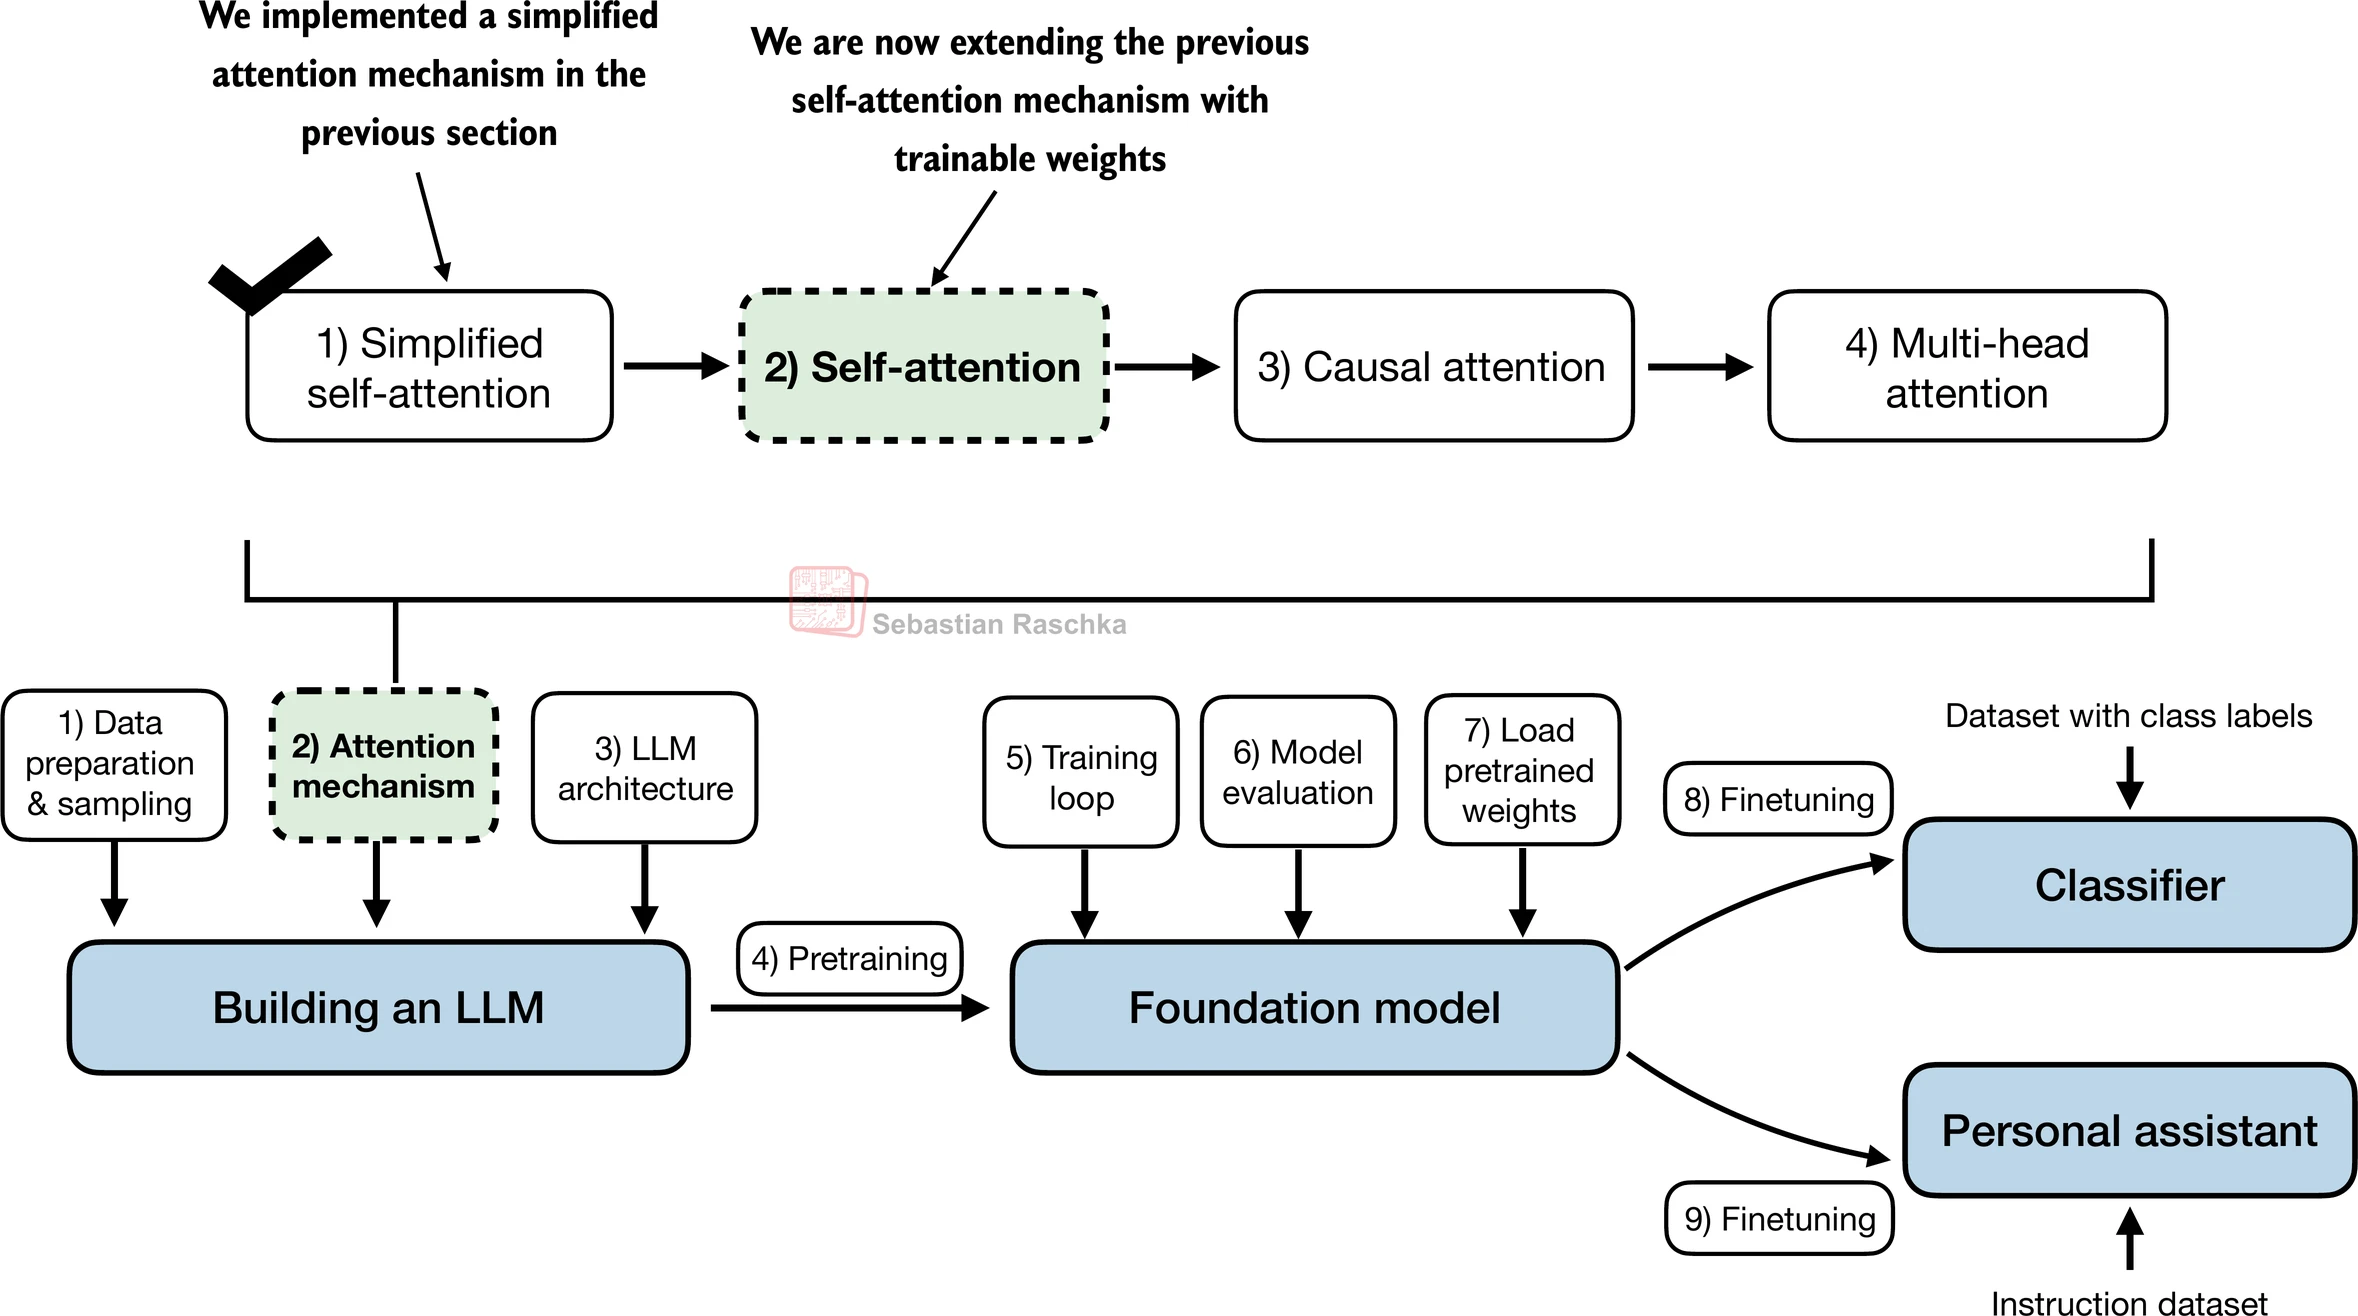


- key = x(i).W(k)
- value = x(i).W(v)
- query = x(i).W(q)
- requires_grad = False (to treat tensor as constant)
- compute the 3D to 2D as the d_in is the input dimension(3D) and d_out is the output dimension (2D)

In [69]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2


In [ ]:
# torch.manual_seed(123)
# W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
# w_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
# W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

# query_2 = x_2 @ W_query
# key_2 = x_2 @ w_key
# value_2 = x_2 @ W_value   

In [59]:
print("Query vector for x2:\n", query_2)

Query vector for x2:
 tensor([0.4306, 1.4551])


In [60]:
keys = inputs @ w_key
values = inputs @ W_value
print("input shape : ",inputs.shape)
print("-----------------------------------------------------------------------")
print("Keys matrix:\n", keys, "output shape\n",keys.shape)
print("Values matrix:\n", values, "output shape \n",values.shape)

input shape :  torch.Size([6, 3])
-----------------------------------------------------------------------
Keys matrix:
 tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]]) output shape
 torch.Size([6, 2])
Values matrix:
 tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9831],
        [0.2393, 0.5493],
        [0.1492, 0.3346],
        [0.3221, 0.7863]]) output shape 
 torch.Size([6, 2])


- compute the unnormalized attention scores by computing the dot product between the query and each key vector
- scale the attention scores by dividing them by the square root of the embedding dimension, 
 (i.e., d_k**0.5):
 - compute the context vector for input query vector 2

In [61]:
# key_2 = keys[1]
# attn_scores_x2 = query_2.dot(key_2)
# # print("Attention scores for x2:\n", attn_scores_x2)
# attn_scores_x2 = query_2 @ keys.T 
# # print("Attention scores for x2:\n", attn_scores_x2)
# # d_k = keys.shape[1]
# attn_weights_x2 = torch.softmax(attn_scores_x2 / d_k**0.5, dim=0)
# # print(attn_weights_x2)
# context_vec_2 = attn_weights_x2@values
# print("Context vector for x2:\n", context_vec_2)


using nn.Linner (preffered wight initilazed scheme)over nn.parameter for stable model running

In [66]:
import torch.nn as nn

In [76]:
class SelfAttention_V(nn.Module):
    def __init__(self, d_in, d_out, qvk_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qvk_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qvk_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qvk_bias)
    def forward(self, x):
        keys = self.W_key(x)
        queries =self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T
        attn_weights= torch.softmax(attn_scores/ keys.shape[-1]**0.5, dim=-1)
        context_vec = attn_weights @ values
        return context_vec
    
torch.manual_seed(789)
SA_v = SelfAttention_V(d_in, d_out)
print(SA_v(inputs))



tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)
